<a href="https://colab.research.google.com/github/sandrazivanovska/VNP/blob/main/lab4_wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [ ]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
This laboratory assignment's primary objective is to fine-tune a pre-trained language model for binary classification on a dataset consisting of wine reviews. The dataset contains two attributes: **description** and **points**. The description is a brief text describing the wine and the points represent a quality metric ranging from 1 to 100. If some wine has at least 90 points it is considered **exceptional**. Your task involves predicting if some wine is **exceptional** based on its review.

## The Wine Reviews Dataset

Load the dataset using the `datasets` library.

In [70]:
from datasets import load_dataset

dataset = load_dataset("csv", data_files="/content/sample_data/wine-reviews.csv")
dataset

DatasetDict({
    train: Dataset({
        features: ['description', 'points'],
        num_rows: 10000
    })
})

In [71]:
df = dataset["train"].to_pandas()
df["points"].unique()

array([ 85,  92,  93,  89,  87,  86,  94,  90,  91,  83,  96,  95,  88,
        84,  82,  81, 100,  80,  97,  98,  99])

In [72]:
df

,description,points
0,"Translucent in color, silky in the mouth, this...",85
1,"On the palate, this wine is rich and complex, ...",92
2,The producer blends 57% Chardonnay from the Ma...,92
3,"Pure Baga in all its glory, packed with dry an...",93
4,Think of Subsídio as a contribution rather tha...,89
...,...,...
9995,"From the folks at Merryvale, this is a blend o...",92
9996,"An easy, versatile food wine or cocktail sippe...",84
9997,Black-fruit aromas blend nicely into chocolate...,93
9998,"This combines 61% Cabernet Sauvignon, 14% Syra...",90


## Target Extraction
Extract the target **exceptional** for each wine review. If some wine has at least 90 points it is considered **exceptional**.

In [73]:
labels = df['points'].apply(lambda x: 1 if x >= 90 else 0)

In [74]:
labels

,points
0,0
1,1
2,1
3,1
4,0
...,...
9995,1
9996,0
9997,1
9998,1


In [75]:
dataset["train"] = dataset["train"].add_column("label", labels)
dataset["train"] = dataset["train"].remove_columns("points")
dataset = dataset.rename_column("description", "text")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 10000
    })
})

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.


In [76]:
dataset = dataset["train"].train_test_split(test_size=0.2)
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [77]:
dataset["train"].features

{'text': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None)}

## Tokenization
Tokenize the texts using the `AutoTokenizer` class.

In [78]:
from transformers import AutoTokenizer

checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [79]:
def tokenize(sample):
    return tokenizer(sample["text"], truncation=True)

In [80]:
tokenized_dataset = dataset.map(tokenize, batched=True)

Map:   0%|          | 0/8000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [81]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [82]:
print(tokenized_dataset["train"][0])

{'text': "The fruit from this cool-climate AVA brings flavors of citrus rind, wet stone and green apple. It's a wine with finesse, barrel fermented and put through partial malolactic. The mouthfeel is lively, and the finish carries a hint of fresh brioche.", 'label': 1, 'input_ids': [101, 1996, 5909, 2013, 2023, 4658, 1011, 4785, 10927, 7545, 26389, 1997, 20418, 15544, 4859, 1010, 4954, 2962, 1998, 2665, 6207, 1012, 2009, 1005, 1055, 1037, 4511, 2007, 21892, 3366, 1010, 8460, 10768, 10867, 14088, 1998, 2404, 2083, 7704, 15451, 6030, 13306, 1012, 1996, 2677, 7959, 2884, 2003, 17133, 1010, 1998, 1996, 3926, 7883, 1037, 9374, 1997, 4840, 7987, 3695, 5403, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [83]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 8000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
})

## Fine-tuning a Pre-trained Language Model for Classification
Fine-tune a pre-trained language model for classification on the given dataset.

Define the model using the `AutoModelForSequenceClassification` class.

In [84]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Define the traning parameters using the `TrainingArguments` class.

In [85]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="trainer",
    eval_strategy="epoch",
    report_to="none",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    metric_for_best_model="f1",
    num_train_epochs=3,
)

Define the training using the `Trainer` class.

In [86]:
!pip install evaluate

In [87]:
import evaluate
import numpy as np

metric = evaluate.load("f1")

In [88]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels, average="weighted")

In [92]:
from transformers import Trainer

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    compute_metrics=compute_metrics,

    data_collator=data_collator,
)

In [93]:
import torch


In [94]:
torch.cuda.is_available()


True

In [95]:
device = "cuda" if torch.cuda.is_available() else "cpu"


In [96]:
device


'cuda'

In [97]:
model.to(device)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [98]:
trainer.train()

Epoch,Training Loss,Validation Loss,F1
1,0.495800,0.472660,0.791559
2,0.374000,0.468028,0.814081
3,0.313300,0.658833,0.824069


TrainOutput(global_step=3000, training_loss=0.4081095987955729, metrics={'train_runtime': 546.7129, 'train_samples_per_second': 43.899, 'train_steps_per_second': 5.487, 'total_flos': 1056148331766240.0, 'train_loss': 0.4081095987955729, 'epoch': 3.0})

Use the trained model to make predictions for the test set.

In [99]:
trainer.evaluate()


{'eval_loss': 0.6588333249092102,
 'eval_f1': 0.8240689248831949,
 'eval_runtime': 10.0225,
 'eval_samples_per_second': 199.55,
 'eval_steps_per_second': 24.944,
 'epoch': 3.0}

In [100]:
predictions = trainer.predict(tokenized_dataset["test"])

In [101]:
logits, labels = predictions.predictions, predictions.label_ids
preds = np.argmax(logits, axis=-1)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [102]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
print(classification_report(labels, preds))


              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1000
           1       0.80      0.87      0.83      1000

    accuracy                           0.82      2000
   macro avg       0.83      0.82      0.82      2000
weighted avg       0.83      0.82      0.82      2000



Text(0.5, 1.0, 'Confusion Matrix')

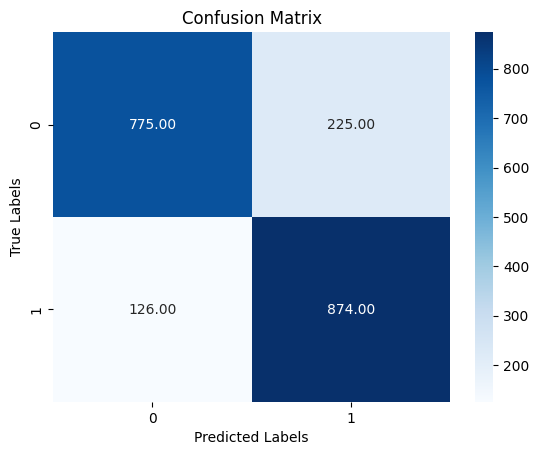

In [104]:
sns.heatmap(confusion_matrix(labels, preds), annot=True, fmt="5.2f", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Laboratory Exercise - Bonus Task (+ 2 points)

Implement a simple machine learning pipeline to classify wine reviews as **exceptional** or not. Use TF-IDF vectorization to convert text into numerical features and train a logistic regression. Split the dataset into training and testing sets, fit the pipeline on the training data, and evaluate its performance using metrics such as precision, recall, and F1-score. Analyze the texts to find the most influential words or phrases associated with the **exceptional** wines. Use the coefficients from the logistic regression trained on TF-IDF features to identify the top positive and negative keywords for **exceptional** wines. Present these keywords in a simple table or visualization (e.g., bar chart).

In [106]:
import pandas as pd

In [107]:
data = pd.read_csv('/content/sample_data/wine-reviews.csv')

In [108]:
data

,description,points
0,"Translucent in color, silky in the mouth, this...",85
1,"On the palate, this wine is rich and complex, ...",92
2,The producer blends 57% Chardonnay from the Ma...,92
3,"Pure Baga in all its glory, packed with dry an...",93
4,Think of Subsídio as a contribution rather tha...,89
...,...,...
9995,"From the folks at Merryvale, this is a blend o...",92
9996,"An easy, versatile food wine or cocktail sippe...",84
9997,Black-fruit aromas blend nicely into chocolate...,93
9998,"This combines 61% Cabernet Sauvignon, 14% Syra...",90


In [111]:
data['points'] = data['points'].map(lambda x: 1 if x>=90 else 0)

In [113]:
data

,description,points
0,"Translucent in color, silky in the mouth, this...",0
1,"On the palate, this wine is rich and complex, ...",1
2,The producer blends 57% Chardonnay from the Ma...,1
3,"Pure Baga in all its glory, packed with dry an...",1
4,Think of Subsídio as a contribution rather tha...,0
...,...,...
9995,"From the folks at Merryvale, this is a blend o...",1
9996,"An easy, versatile food wine or cocktail sippe...",0
9997,Black-fruit aromas blend nicely into chocolate...,1
9998,"This combines 61% Cabernet Sauvignon, 14% Syra...",1


In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data['description'],  data['points'], test_size=0.2)

In [116]:
from collections import Counter

print(f"Training class distributions summary: {Counter(Y_train)}")
print(f"Test class distributions summary: {Counter(Y_test)}")

Training class distributions summary: Counter({1: 4010, 0: 3990})
Test class distributions summary: Counter({0: 1010, 1: 990})


In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


model = make_pipeline(TfidfVectorizer(), LogisticRegression())
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

In [119]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1010
           1       0.79      0.81      0.80       990

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000

